In [1]:
#Imports
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

2024-02-08 00:38:42.396696: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [44]:
#Download asset data
df = yf.download(tickers="AAPL", start='2010-01-01', end='2023-12-31')

#calculatre technical indicators
df['MA'] = ta.ema(df['Close'], length=20)
df['rsi'] = ta.rsi(df['Close'], length=14)
df['coppock'] = ta.coppock(df['Close'], length=12)
df['returns'] = df['Close'].pct_change(-1) * 100 * -1
"""df['forecast_tommorrow'] = np.where(df['returns'] > 0,
                                   1,
                                   0) #1 is for UP and 0 is for down"""

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA,rsi,coppock,returns
Date,,,,,,,,,,
2010-01-04 00:00:00-05:00,7.622500,7.660714,7.585000,7.643214,6.478999,493729600,NaN,NaN,NaN,0.172595
2010-01-05 00:00:00-05:00,7.664286,7.699643,7.616071,7.656429,6.490201,601904800,NaN,NaN,NaN,-1.616343
2010-01-06 00:00:00-05:00,7.656429,7.686786,7.526786,7.534643,6.386965,552160000,NaN,NaN,NaN,-0.185213
2010-01-07 00:00:00-05:00,7.562500,7.571429,7.466071,7.520714,6.375156,477131200,NaN,NaN,NaN,0.660442
2010-01-08 00:00:00-05:00,7.510714,7.571429,7.466429,7.570714,6.417542,447610800,NaN,NaN,NaN,-0.889999
...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,193.330404,54.609714,5.026601,-0.284902
2023-12-26 00:00:00-05:00,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,193.303699,53.026883,3.980161,0.051768
2023-12-27 00:00:00-05:00,192.490005,193.500000,191.089996,193.149994,193.149994,48087700,193.289060,53.291938,3.311362,0.222134


In [45]:
#drop NAs
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,MA,rsi,coppock,returns
Date,,,,,,,,,,
2010-02-09 00:00:00-05:00,7.015000,7.053571,6.955357,7.006786,5.939511,632886800,7.207269,42.054113,-12.137974,-0.548386
2010-02-10 00:00:00-05:00,6.996071,7.021429,6.937857,6.968571,5.907117,370361600,7.184536,41.000213,-12.181045,1.786883
2010-02-11 00:00:00-05:00,6.960000,7.133929,6.930714,7.095357,6.014590,550345600,7.176043,45.848891,-11.032437,0.853385
2010-02-12 00:00:00-05:00,7.075357,7.201429,6.982143,7.156429,6.066360,655468800,7.174175,48.063030,-9.429613,1.484760
2010-02-16 00:00:00-05:00,7.212143,7.274643,7.197143,7.264286,6.157786,543737600,7.182757,51.810537,-7.010931,-0.419646
...,...,...,...,...,...,...,...,...,...,...
2023-12-21 00:00:00-05:00,196.100006,197.080002,193.500000,194.679993,194.679993,46482500,193.302025,57.752982,5.560316,-0.557844
2023-12-22 00:00:00-05:00,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,193.330404,54.609714,5.026601,-0.284902
2023-12-26 00:00:00-05:00,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,193.303699,53.026883,3.980161,0.051768


In [47]:
#Normalize data for each column
df_normalized = df.copy()
scaler = MinMaxScaler(feature_range=(0, 1))
for col in df_normalized.columns:
    try:
        if col != 'returns' and col != 'coppock':
            df_normalized[col] = scaler.fit_transform(df_normalized[col].values.reshape(-1, 1))
    except:
        pass
    
df_normalized

,Open,High,Low,Close,Adj Close,Volume,MA,rsi,coppock,returns
Date,,,,,,,,,,
2010-02-09 00:00:00-05:00,0.000288,0.000167,0.000130,0.000200,0.000169,0.327870,0.000178,0.303114,-12.137974,-0.548386
2010-02-10 00:00:00-05:00,0.000189,0.000000,0.000038,0.000000,0.000000,0.186496,0.000056,0.287923,-12.181045,1.786883
2010-02-11 00:00:00-05:00,0.000000,0.000584,0.000000,0.000663,0.000559,0.283420,0.000010,0.357811,-11.032437,0.853385
2010-02-12 00:00:00-05:00,0.000604,0.000935,0.000271,0.000983,0.000829,0.340031,0.000000,0.389726,-9.429613,1.484760
2010-02-16 00:00:00-05:00,0.001320,0.001315,0.001402,0.001547,0.001304,0.279862,0.000046,0.443742,-7.010931,-0.419646
...,...,...,...,...,...,...,...,...,...,...
2023-12-21 00:00:00-05:00,0.989951,0.986812,0.981586,0.982055,0.982154,0.012081,0.999848,0.529396,5.560316,-0.557844
2023-12-22 00:00:00-05:00,0.985135,0.978141,0.978797,0.976405,0.976535,0.007041,1.000000,0.484089,5.026601,-0.284902
2023-12-26 00:00:00-05:00,0.976918,0.970249,0.978061,0.973527,0.973674,0.002623,0.999857,0.461275,3.980161,0.051768


In [48]:
def LSTM_create_sequences(data, sequence_lenght, target_col_index):
    sequences = []
    labels = []
    
    for i in range(len(data) - sequence_lenght):
        # Select sequence length rows for all columns
        seq = data.iloc[i:i+sequence_lenght, :-1] # -1 to leave y out
        label = data.iloc[i+sequence_lenght, target_col_index]
        
        sequences.append(seq.values)
        labels.append(label)

    return np.array(sequences), np.array(labels)

In [49]:
#This cell uses the df_normalized dataset
#Define x and y using LSTM_create_sequences
X, y = LSTM_create_sequences(data=df_normalized, 
                            sequence_lenght=10,
                            target_col_index=df_normalized.columns.get_loc("returns"))

In [27]:
#Define x and y using LSTM_create_sequences
X, y = LSTM_create_sequences(data=df, 
                            sequence_lenght=10,
                            target_col_index=df.columns.get_loc("returns"))

In [50]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.75) #75% of data to train model
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [51]:
# Reshape the data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 9)) #9 because of the 9 cols
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 9))

In [32]:
X_train

array([[[  7.01499987,   7.05357122,   6.95535707, ...,   7.20726931,
          42.05411338, -12.13797434],
        [  6.99607086,   7.02142906,   6.93785715, ...,   7.18453616,
          41.00021296, -12.18104479],
        [  6.96000004,   7.13392878,   6.93071413, ...,   7.1760429 ,
          45.84889082, -11.03243722],
        ...,
        [  7.20928621,   7.25714302,   7.18249989, ...,   7.19420541,
          49.40512512,  -1.19278657],
        [  7.22642899,   7.23214293,   7.11392879, ...,   7.19074365,
          47.61744215,   0.72515274],
        [  7.14285707,   7.19035721,   6.9896431 , ...,   7.17618302,
          43.10267277,   1.48615526]],

       [[  6.99607086,   7.02142906,   6.93785715, ...,   7.18453616,
          41.00021296, -12.18104479],
        [  6.96000004,   7.13392878,   6.93071413, ...,   7.1760429 ,
          45.84889082, -11.03243722],
        [  7.07535696,   7.20142889,   6.98214293, ...,   7.17417489,
          48.06303019,  -9.42961253],
        ...,


In [52]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 9)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
82/82 [==============================] - 2s 3ms/step - loss: 3.0702
Epoch 2/50
82/82 [==============================] - 0s 3ms/step - loss: 3.0646
Epoch 3/50
82/82 [==============================] - 0s 3ms/step - loss: 3.0671
Epoch 4/50
82/82 [==============================] - 0s 3ms/step - loss: 3.0521
Epoch 5/50
82/82 [==============================] - 0s 3ms/step - loss: 3.0391
Epoch 6/50
82/82 [==============================] - 0s 4ms/step - loss: 3.0477
Epoch 7/50
82/82 [==============================] - 0s 3ms/step - loss: 3.0421
Epoch 8/50
82/82 [==============================] - 0s 3ms/step - loss: 3.0437
Epoch 9/50
82/82 [==============================] - 0s 3ms/step - loss: 3.0328
Epoch 10/50
82/82 [==============================] - 0s 3ms/step - loss: 3.0291
Epoch 11/50
82/82 [==============================] - 0s 3ms/step - loss: 3.0361
Epoch 12/50
82/82 [==============================] - 0s 3ms/step - loss: 3.0331
Epoch 13/50
82/82 [==============================

In [54]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions

28/28 [==============================] - 0s 1ms/step


array([[ 2.14899674e-01],
       [ 2.09488273e-01],
       [ 2.14525938e-01],
       [ 2.21802548e-01],
       [ 2.23611459e-01],
       [ 2.27395236e-01],
       [ 2.36079216e-01],
       [ 2.37870306e-01],
       [ 2.23604277e-01],
       [ 1.83561191e-01],
       [ 1.13542765e-01],
       [ 9.16346908e-04],
       [-1.22881055e-01],
       [-1.74463496e-01],
       [-1.70554534e-01],
       [-2.47022994e-02],
       [ 1.81603000e-01],
       [ 2.87416458e-01],
       [ 1.93534985e-01],
       [ 2.34580263e-01],
       [ 2.41105199e-01],
       [ 2.20169768e-01],
       [ 1.51679248e-01],
       [ 8.85612071e-02],
       [ 4.84931953e-02],
       [ 2.71206778e-02],
       [ 4.80402168e-03],
       [-1.53590217e-02],
       [-8.81365314e-03],
       [-3.95805668e-03],
       [ 3.56631214e-03],
       [ 2.04322413e-02],
       [ 3.78983170e-02],
       [ 6.25024065e-02],
       [ 9.93896872e-02],
       [ 1.02876008e-01],
       [ 9.27254707e-02],
       [ 9.15240645e-02],
       [ 1.2

In [55]:
realAndPred = pd.DataFrame({'y_test': y_test})
realAndPred['predict'] = predictions
realAndPred.head(50)

,y_test,predict
0,0.683035,0.214900
1,-1.245823,0.209488
2,-0.202434,0.214526
3,2.063898,0.221803
4,-1.399483,0.223611
5,0.280140,0.227395
6,-4.768698,0.236079
7,-0.248344,0.237870
8,2.315156,0.223604
9,-1.670191,0.183561


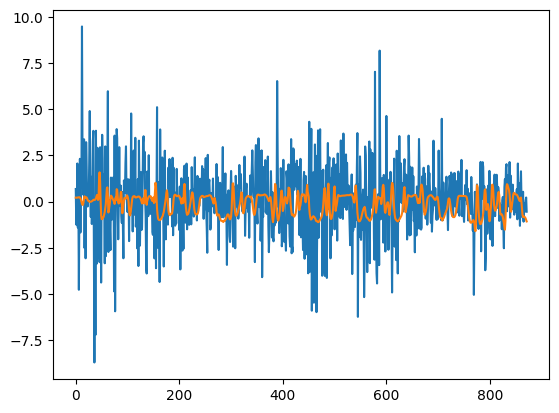

In [56]:
plt.plot(realAndPred['y_test'])
plt.plot(realAndPred['predict'])